In [1]:
import numpy as np
from matplotlib import pyplot as plt
from src.kalman import Kalman



In [2]:
np.array([1,2,3]) + np.array([3,4,5]).T


array([4, 6, 8])

In [6]:
n = 10

x1 = np.linspace(10,5,n)
x1 = x1.reshape(n,1)
x2 = np.linspace(0,-5,n)
x2 = x2.reshape(n,1)
y1 = np.linspace(10,5,n)
y1 = y1.reshape(n,1)
y2 = np.linspace(0,-5,n)
y2 = y2.reshape(n,1)

zero = np.zeros((n,1))


x = np.vstack((np.vstack((x1,zero)),x2))
y = np.vstack((np.vstack((y1,zero)),y2))


def noiseVector(n):
    """
    Generates a vector of noise values
    """
    return np.random.randn(n)[0] / 5

noisex = noiseVector(n)
noisey = noiseVector(n)
noisez = noiseVector(n)

model_z = 2*x + 0.1*y


measurement_z = model_z + noisez



model = np.array([x,y,model_z]).reshape(3,3*n)

measurement = np.array([x+noisex,y+noisey,measurement_z]).reshape(3,3*n)

#make the middle part of measurement zero
measurement[:,n:2*n] = np.zeros((3,n))



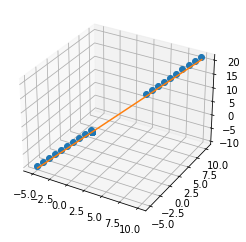

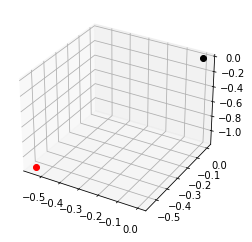

In [4]:
# def noiseVector(n):
#     """
#     Generates a vector of noise values
#     """
#     return np.random.randn(n) / 5

# noisex = noiseVector(n)
# noisey = noiseVector(n)
# noisez = noiseVector(n)

# model_z = (2*x + 0.1*y)

# measurement_z = (2*x + 0.1*y + noisez)

# model = np.array([x,y,model_z])

# measurement = np.array([x+noisex,y+noisey,measurement_z])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')

v = -(model.T[0] - model.T[1])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot(v[0],v[1],v[2],'o',label='v',color='red')
ax.plot(0,0,0,'o',label='origin',color='black')

In [5]:


r_xy = 3
r_z = 3
x_init = model.T[0]

P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])


kalman = Kalman(measurement,x_init,P_init)
kalman.R = R_init
kalman.Q = Q_init
kalman.v = v

estimates = kalman.positionUpdate()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:

def kalmanPosition(measurement, x_prediction, P_prediction, Q, R,k):
    """
    Kalman filter for position
    input:
        measurement: measured x,y,z
        x_prediction: x,y,z prediction from previous iteration
        P_prediction: covariance matrix from previous iteration
        Q: process noise covariance matrix
        R: measurement noise covariance matrix
        k: iteration number
    output:
        x_prediction: x,y,z prediction from current iteration
        P_prediction: covariance matrix from current iteration
    """
    # A = np.array([[v[0]*k,0,0],[0,v[1]*k,0],[0,0,v[2]*k]])
    A = np.eye(3)
    B = v 
    
    # Prediction
    x_prediction = A @ x_prediction + B
    P_prediction = A @ P_prediction @ A.T + Q
    

    # Update
    H = np.eye(3)
    K = P_prediction @ H.T @ np.linalg.inv(H @ P_prediction @ H.T + R)
    x_prediction = x_prediction + K @ (measurement - H @ x_prediction)
    P_prediction = (np.eye(3) - K @ H) @ P_prediction


    return x_prediction, P_prediction



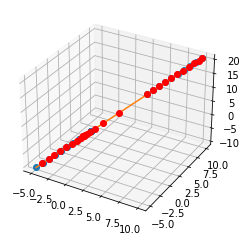

In [ ]:
k=1
r_xy = 3
r_z = 3
x_init = model.T[0]

P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])

kalman_estimates = np.zeros_like(measurement).T
kalman_estimates[0] = x_init

for i in range(n*3-1):
    x_prediction, P_prediction = kalmanPosition(measurement.T[i],x_init,P_init,Q_init,R_init,k)
    kalman_estimates[i+1] = x_prediction
    x_init = x_prediction
    P_init = P_prediction
    k+=1

kalman_estimates = kalman_estimates.T

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')
ax.plot(kalman_estimates[0],kalman_estimates[1],kalman_estimates[2],'o',label='kalman_estimates',color='red')

In [ ]:
for i in range(n):
    print(kalman_estimates.T[i],model.T[i])

kalman_estimates.T


[10. 10. 21.] [10. 10. 21.]
[ 9.65191938  9.72324414 20.29467815] [ 9.44444444  9.44444444 19.83333333]
[ 9.22803061  9.34461917 19.420788  ] [ 8.88888889  8.88888889 18.66666667]
[ 8.74979762  8.89296777 18.42605711] [ 8.33333333  8.33333333 17.5       ]
[ 8.23851522  8.39690539 17.357837  ] [ 7.77777778  7.77777778 16.33333333]
[ 7.70810346  7.87513745 16.24708051] [ 7.22222222  7.22222222 15.16666667]
[ 7.16679035  7.33872054 15.11208358] [ 6.66666667  6.66666667 14.        ]
[ 6.61929551  6.79399678 13.96334088] [ 6.11111111  6.11111111 12.83333333]
[ 6.06830082  6.24457    12.80681582] [ 5.55555556  5.55555556 11.66666667]
[ 5.51532564  5.69248188 11.64588691] [ 5.   5.  10.5]


array([[10.        , 10.        , 21.        ],
       [ 9.65191938,  9.72324414, 20.29467815],
       [ 9.22803061,  9.34461917, 19.420788  ],
       [ 8.74979762,  8.89296777, 18.42605711],
       [ 8.23851522,  8.39690539, 17.357837  ],
       [ 7.70810346,  7.87513745, 16.24708051],
       [ 7.16679035,  7.33872054, 15.11208358],
       [ 6.61929551,  6.79399678, 13.96334088],
       [ 6.06830082,  6.24457   , 12.80681582],
       [ 5.51532564,  5.69248188, 11.64588691],
       [ 4.96122992,  5.13888803, 10.48246637],
       [ 2.49247438,  2.592983  ,  5.27033778],
       [ 1.09579552,  1.15265742,  2.32161738],
       [ 0.30563616,  0.3378053 ,  0.65340355],
       [-0.14138976, -0.12319035, -0.29037423],
       [-0.39429086, -0.3839947 , -0.82430844],
       [-0.53736749, -0.53154253, -1.12637716],
       [-0.61831188, -0.61501645, -1.29726995],
       [-0.66410547, -0.66224111, -1.39395108],
       [-0.6900128 , -0.68895806, -1.44864761],
       [-0.70466965, -0.70407294, -1.479